In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm


In [67]:
df=pd.read_csv(r"C:\Users\abc\Downloads\income.data_\income.data.csv")
df.head()


,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [68]:
df.rename(columns={df.columns[0]:'ID'},inplace=True)

In [69]:
df

,ID,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398
...,...,...,...
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664


In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         498 non-null    int64  
 1   income     498 non-null    float64
 2   happiness  498 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [71]:
df.describe()


,ID,income,happiness
count,498.000000,498.000000,498.000000
mean,249.500000,4.466902,3.392859
std,143.904482,1.737527,1.432813
min,1.000000,1.506275,0.266044
25%,125.250000,3.006256,2.265864
50%,249.500000,4.423710,3.472536
75%,373.750000,5.991913,4.502621
max,498.000000,7.481521,6.863388


In [72]:
df.isnull().sum()


ID           0
income       0
happiness    0
dtype: int64

<AxesSubplot:xlabel='income', ylabel='happiness'>

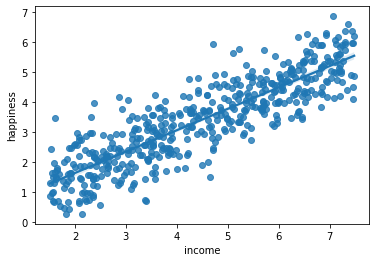

In [73]:
sns.regplot(x='income',y='happiness',data=df)

In [74]:
X=df["income"]
y=df['happiness']

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [76]:
X_train_sm=sm.add_constant(X_train)


In [78]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1073.
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          9.24e-115
Time:                        17:34:45   Log-Likelihood:                -442.24
No. Observations:                 398   AIC:                             888.5
Df Residuals:                     396   BIC:                             896.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2699      0.102      2.643      0.009       0.069       0.471
income         0.6972      0.021     32.751      0.000       0.655       0.739
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.729
Skew:                           0.104   Prob(JB):                        0.694
Kurtosis:                       2.977   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

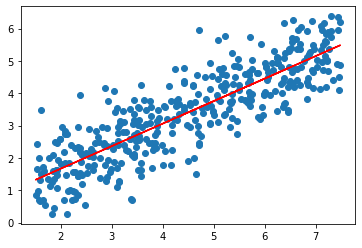

In [79]:
plt.scatter(X_train,y_train)
plt.plot(X_train,0.2699+0.6972*X_train,"r")

(array([ 3., 23., 41., 87., 81., 88., 51., 16.,  5.,  3.]),
 array([-2.01306513, -1.57266141, -1.13225769, -0.69185398, -0.25145026,
         0.18895345,  0.62935717,  1.06976089,  1.5101646 ,  1.95056832,
         2.39097204]),
 <BarContainer object of 10 artists>)

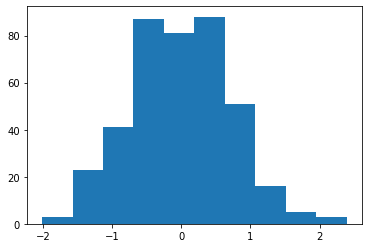

In [81]:
y_pred=lr.predict(X_train_sm)
res=y_train-y_pred
plt.hist(res)

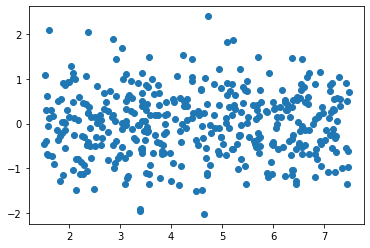

In [82]:
plt.scatter(X_train,res)

In [83]:
X_test_sm=sm.add_constant(X_test)
y_pred=lr.predict(X_test_sm)

In [85]:
MSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [86]:
MSE


0.6416214056971185

In [88]:
r2=r2_score(y_test,y_pred)
print(r2)

0.8151437588727584


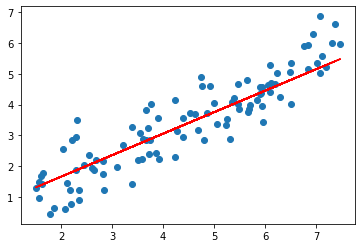

In [89]:
plt.scatter(X_test,y_test)
plt.plot(X_test,0.2699+0.6972*X_test,"r")